In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import seaborn as sns

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['font.family'] = 'Liberation Serif'

In [3]:
def autolabel(rects):
#### funcion que realiza etiquetas en los BARPLOTs
    for rect in rects:
        height = rect.get_height() #### obtiene la altura de la barra
        ax.text(rect.get_x() + rect.get_width()/2. #### posiciona el label horizontalmente
                , height, #### posiciona el label verticalmente
                '%d' % int(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                fontsize= 14)
def removeSpines(ax):
#### remuevo los bordes, labels y lineas 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

In [4]:
folder = os.getcwd()

#### Carga de datos

In [5]:
data_types_clicks = {'advertiser_id':'category' , 'action_id':'category' , 'source_id':'category', 'created':str,\
                     'countrycode':'category','latitude':np.float16, 'longitude':np.float16, 'wifi_conection':'category',\
                     'carrier_id':'category', 'trans_id':'category', 'os_minor':'category', 'agent_devise':'category', \
                     'os_major':'category', 'specs_brnad':'category', 'brand':'category', 'timeToClick': np.float16, 'touchX':np.float16, \
                     'touchY':np.float16, 'ref_type':'category', 'ref_hash':'category'}

data_types_installs = { "created" : str, "application_id" : 'category', "ref_type" : 'category',"click_hash" : 'category',\
                       "attributed" : bool, "implicit": bool, "device_countrycode" : 'category',"device_brand" : 'category',\
                       "device_model" : 'category', "session_user_agent" : 'category', "user_agent": 'category',"event_uuid":\
                       'category', "kind" : str, "wifi" : 'category', "trans_id" : 'category', "ip_address" : 'category', \
                       "device_language" : 'category'}

data_types_events = {'ref_type':'category', 'event_id' : 'category', 'ref_hash': 'category', 'application_id':'category',\
                     'attributed':bool, 'device_os':'category', 'device_os_version':'category', 'device_brand':'category',\
                     'device_model':'category','device_city':'category', 'session_user_agent':'category', 'trans_id':\
                     'category', 'user_agent':'category', 'event_uuid':'category','carrier':'category','kind':'category',\
                     'wifi':"category",'connection_type':'category','ip_address':'category','device_language':'category',\
                     'device_countrycode':'category'}

data_types_auctions = { "auction_type_id" : 'category', "country" : 'category', "date" : str, "device_id" : 'category', \
                      "platform" : 'category', "ref_type_id" : 'category', "source_id" : 'category'}

In [6]:
events.info()

NameError: name 'events' is not defined

In [7]:
events = pd.read_csv( folder + '/data/events.csv.gzip', parse_dates=['date'],infer_datetime_format=True,\
                    compression='gzip',low_memory=False, dtype=data_types_events)
clicks = pd.read_csv( folder + '/data/clicks.csv.gzip', compression='gzip',low_memory=False)
installs = pd.read_csv( folder + '/data/installs.csv.gzip',dtype=data_types_installs, compression='gzip',low_memory=False)
auctions = pd.read_csv( folder + '/data/auctions.csv.gzip',dtype=data_types_auctions, compression='gzip',low_memory=False,parse_dates=['date'])
target_c = pd.read_csv( folder + '/data/target_competencia.csv',low_memory=False)

#### Mirada preliminar

In [19]:
events.shape, clicks.shape, installs.shape, auctions.shape, target_c.shape

((2494423, 22), (26351, 20), (3412, 18), (19571319, 7), (235, 4))

In [20]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [37]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [38]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [42]:
auctions.columns

Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')

In [43]:
clicks.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [44]:
auctions.dtypes

auction_type_id    float64
country              int64
date                object
device_id            int64
platform             int64
ref_type_id          int64
source_id            int64
dtype: object

In [45]:
events.dtypes

date                   object
event_id                int64
ref_type                int64
ref_hash                int64
application_id          int64
attributed               bool
device_countrycode      int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id               object
user_agent            float64
event_uuid             object
carrier               float64
kind                  float64
device_os             float64
wifi                   object
connection_type        object
ip_address              int64
device_language       float64
dtype: object

In [46]:
installs.dtypes

created                object
application_id          int64
ref_type                int64
ref_hash                int64
click_hash            float64
attributed               bool
implicit                 bool
device_countrycode      int64
device_brand          float64
device_model          float64
session_user_agent     object
user_agent             object
event_uuid             object
kind                   object
wifi                   object
trans_id               object
ip_address              int64
device_language       float64
dtype: object

### Cantidad de Eventos por APP

In [56]:
toplot = events[['application_id','event_id']].groupby('application_id').agg('count').reset_index()
toplot = toplot.sort_values(by = 'event_id',ascending = False)[0:15]
toplot.columns = ['application_id','events_count']

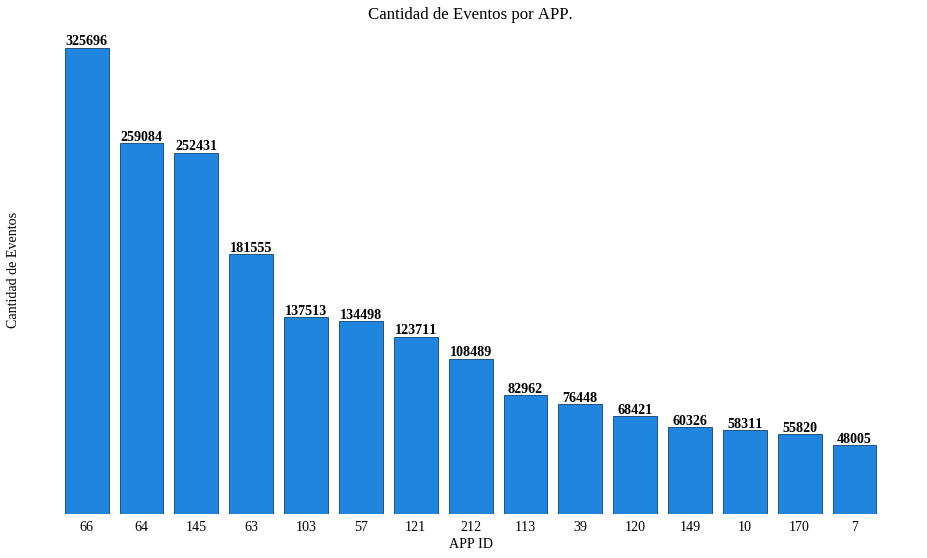

In [60]:
tox=toplot.application_id.tolist()
height = toplot.events_count.tolist()
fig, ax = plt.subplots(figsize=(16,9))
rects1 = ax.bar(tox, height , color='#1F85DE',edgecolor='#265680', align='center')

################### visualizacion de estilo minimalista ######################
##############################################################################
#### titulos
ax.set_title('Cantidad de Eventos por APP.')
ax.set_ylabel('Cantidad de Eventos')
ax.set_xlabel('APP ID')
ax.set_yticks([])
#####################################################################################
autolabel(rects1)
removeSpines(ax)
### aplico la funcion autolabel para poner la cantidad sobre cada barra
plt.show()

#### Cantidades de ocurrencias de cada evento

In [61]:
toplot = events['event_id'].value_counts().reset_index()[0:15]
toplot.columns = ['event_id','events_count']

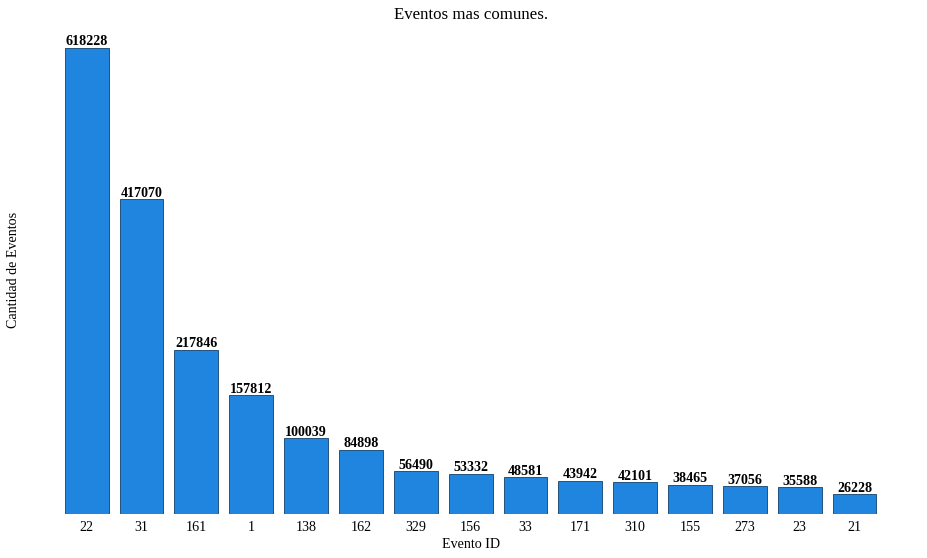

In [62]:
tox=toplot.event_id.tolist()
height = toplot.events_count.tolist()
fig, ax = plt.subplots(figsize=(16,9))
rects1 = ax.bar(tox, height , color='#1F85DE',edgecolor='#265680', align='center')
#### titulos
ax.set_title('Eventos mas comunes.')
ax.set_ylabel('Cantidad de Eventos')
ax.set_xlabel('Evento ID')
ax.set_yticks([])
####
autolabel(rects1)
removeSpines(ax)
### aplico la funcion autolabel para poner la cantidad sobre cada barra
### se remueven los bordes
plt.show()

#### Hay eventos que tienden a concentrarse en pocas IPs 

In [381]:
toplot = events[['event_id','ip_address','date']].groupby(['event_id','ip_address']).agg('count')

In [382]:
toplot = toplot.sort_values(by='date',ascending=False).reset_index()
toplot.columns = ['event_id','ip_address','event_count']
toplot['event_id'] = toplot['event_id'].astype('str')
#### se cuenta la cantidad de veces que un tipo de evento se dispara 
#### muchas veces desde una misma ip
over300forIP = toplot.loc[toplot['event_count']>300]
over200forIP = toplot.loc[toplot['event_count']>200]
over100forIP = toplot.loc[toplot['event_count']>100]

In [383]:
over300forIP = over300forIP[['event_id','event_count']].groupby('event_id').agg(['count']).reset_index()
over300forIP.columns = ['event_id','over300forIP']
over300forIP = over300forIP.sort_values(by='over300forIP',ascending=False)[0:20]
over200forIP = over200forIP[['event_id','event_count']].groupby('event_id').agg(['count']).reset_index()
over200forIP.columns = ['event_id','over200forIP']
over200forIP = over200forIP.sort_values(by='over200forIP',ascending=False)[0:20]
over100forIP = over100forIP[['event_id','event_count']].groupby('event_id').agg(['count']).reset_index()
over100forIP.columns = ['event_id','over100forIP']
over100forIP = over100forIP.sort_values(by='over100forIP',ascending=False)[0:20]

In [391]:
dum = pd.merge(over100forIP,over200forIP,how='outer',on='event_id')
dum = pd.merge(dum,over300forIP,how='outer',on='event_id')[0:10]

In [392]:
dum

,event_id,over100forIP,over200forIP,over300forIP
0,22,342.0,162.0,101.0
1,138,148.0,77.0,51.0
2,33,106.0,38.0,14.0
3,23,65.0,19.0,6.0
4,171,63.0,27.0,17.0
5,273,56.0,28.0,16.0
6,98,39.0,22.0,12.0
7,21,36.0,6.0,2.0
8,272,35.0,12.0,9.0
9,31,24.0,8.0,3.0


In [ ]:
tox=toplot.event_id.tolist()
height = toplot.events_count.tolist()
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(tox, height , color='#1F85DE',edgecolor='#265680', align='center')
#### titulos
ax.set_title('Eventos mas comunes.')
ax.set_ylabel('Cantidad de Eventos')
ax.set_xlabel('Evento ID')
ax.set_yticks([])
####
autolabel(rects1)
removeSpines(ax)
### aplico la funcion autolabel para poner la cantidad sobre cada barra
### se remueven los bordes
plt.show()

In [51]:
events.date.min(), events.date.max()

(Timestamp('2019-03-05 00:00:00.255000'),
 Timestamp('2019-03-13 23:59:59.984000'))

In [ ]:
events['hour'] = events.date.dt.hour
events['day'] = events.date.dt.day

In [102]:
clicks.loc[clicks.touchY<=1].touchY

Series([], Name: touchX, dtype: float64)

C:\Users\Andres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\Users\Andres\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


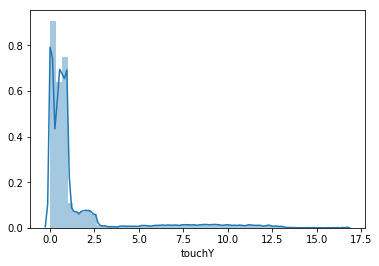

In [21]:
sns.distplot(clicks.touchY.dropna())

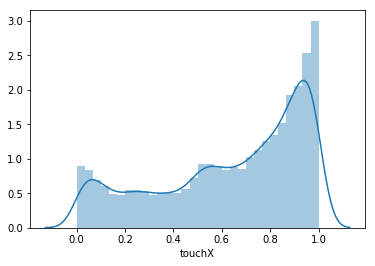

In [22]:
sns.distplot(clicks.touchX.dropna());

In [87]:
clicks.touchX = clicks.touchX.apply(lambda x: round(x,1))
clicks.touchY = clicks.touchY.apply(lambda x: round(x,1))

In [90]:
toplot = clicks.groupby(['touchX','touchY']).agg('count')\
    .reset_index()[['touchX','touchY','advertiser_id']].sort_values(by='advertiser_id',ascending=False)

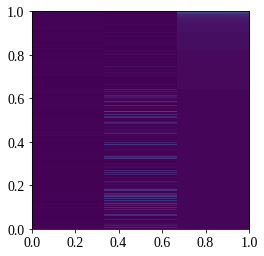

In [94]:
plt.imshow(toplot,extent=[0,1,0,1])

In [95]:
toplot.touchY.max()

16.6

In [75]:
clicks.groupby(['touchX','touchY']).agg('count').reset_index()[['touchX','touchY','advertiser_id']].sort_values(by='advertiser_id',ascending=False)

,touchX,touchY,advertiser_id
21817,0.996,0.060,7
21800,0.996,0.035,6
21828,0.996,0.077,6
19656,0.957,0.055,6
3645,0.250,3.954,5
21831,0.996,0.085,5
16839,0.898,0.023,5
21808,0.996,0.048,5
21501,0.992,0.089,4
21834,0.996,0.091,4


In [24]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [27]:
clicks['ref_hash'].value_counts()

4063522808706112974    41
6841615430383729819    32
1244272413279716745    26
871778630200697460     21
1486699123421703687    21
5087801386146573665    20
925803901826809324     17
5410279713092214908    16
6972928558719957056    16
5141358577301248038    16
519658456951133298     16
1840632706493884506    16
1331942267794810997    14
1211156366060784398    14
1800317677967270083    14
8649985029035959510    14
6720955205547143860    14
8292793494956750501    14
9122294037688413433    14
4087245142961821607    13
2878289124029282270    13
4743839512322600375    12
1022865914163198106    12
9013086364156440526    12
2108916708309430205    12
7298861376107043945    12
2161849021063988604    12
5137915707382060256    12
3272242210010018861    12
7539041810210425316    12
                       ..
1131153511584379029     1
6624531815907593673     1
8656402155431163452     1
5268701924955006446     1
5564448142525849564     1
1534878130600836246     1
2721577658846468141     1
302491930980

In [25]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [28]:
events['ref_hash'].value_counts()

7823950631004872496    2913
7298478026707033340    2822
5034957474698180142    2681
5724169280369284055    2524
1706781657278990931    2300
244029859389272148     2240
7526135353349769077    2079
8876061431560425145    2053
99390558091295167      1966
2514745445577342929    1925
7932055701089699678    1880
959309904051180368     1879
2172957424689981672    1737
8938936221115319274    1712
5517347051664000025    1696
7881865551295335841    1680
2911380620292361100    1615
7984059267284799536    1599
3931396627810108588    1558
5929807100024800254    1460
8291491622395815056    1431
6431911391083614553    1398
6290225060459708362    1384
1392381574052047210    1369
524370095063968889     1355
5639133576747886119    1345
2456256724056711249    1339
8847676025636425100    1336
3436575239155975568    1317
6630253456783010456    1312
                       ... 
7409130364005900291       1
2653531879436587530       1
7409312737851263453       1
7409361165273163618       1
7409471177521206210 

In [26]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


In [38]:
installs_refHash = installs['ref_hash']
clicks_refHash = clicks['ref_hash']
events_refHash = events['ref_hash']
en_comun_installs_clicks = installs_refHash.isin(clicks_refHash)
en_comun_installs_clicks.value_counts()
en_comun_installs_events = installs_refHash.isin(events_refHash)
en_comun_clicks_installs = clicks_refHash.isin(installs_refHash)
en_comun_clicks_installs.value_counts()
en_comun_events_installs = events_refHash.isin(installs_refHash)
en_comun_events_installs.value_counts()
en_comun_events_clicks = events_refHash.isin(clicks_refHash)
en_comun_events_clicks.value_counts()
en_comun_installs_events.value_counts()

True     3111
False     301
Name: ref_hash, dtype: int64

In [41]:
installs.merge(events, on='ref_hash')

ValueError: You are trying to merge on int64 and category columns. If you wish to proceed you should use pd.concat

In [56]:
auctions.head()


0    True
1    True
2    True
3    True
4    True
Name: DOY, dtype: bool

In [59]:
auctions['DOW'] = auctions['date'].dt.dayofweek
auctions['DOY'] = auctions['date'].dt.dayofyear
auctions = auctions[(auctions['DOY'] < 71)]
auctions.head()
auctions['DOY'].value_counts()

69    2637534
70    2574916
67    2303002
68    2074552
66    2047661
64    1182401
65    1032970
Name: DOY, dtype: int64

In [63]:
auctions.drop('DOY',axis=1,inplace=True)
auctions_diasDeLaSemana = auctions[['DOW']]
auctions_diasDeLaSemana['Hora'] = auctions['date'].dt.hour
Dias = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sábado','Domingo']
auctions_diasDeLaSemana['DOW'] = auctions_diasDeLaSemana['DOW'].apply(lambda x: Dias[x])

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [64]:
auctions_diasDeLaSemana['Cantidad'] = 1
auctions_diasDeLaSemana.head()

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DOW,Hora,Cantidad
0,Lunes,14,1
1,Lunes,14,1
2,Lunes,14,1
3,Lunes,14,1
4,Lunes,14,1


In [65]:
table = auctions_diasDeLaSemana.pivot_table(index='DOW',columns='Hora',aggfunc=np.sum)
table.columns = table.columns.droplevel(0)
table = table.reindex(index = Dias)
table.head()

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DOW,,,,,,,,,,,,,,,,,,,,,
Lunes,203789,197885,185756,121824,87889,60412,39265,28928,29559,42622,...,99858,110137,123679,117639,105929,113197,123687,140195,160763,163831
Martes,14859,174893,155339,108498,74230,52970,38836,29149,25668,25213,...,20191,21520,24486,25590,27850,27216,32064,34112,32031,33081
Miercoles,34045,121530,144125,105575,79694,49859,32616,22241,19658,25923,...,15835,18415,19282,19893,21387,21257,25604,28133,27221,26983
Jueves,33714,73944,117576,105663,69720,48781,30441,23366,25644,39185,...,107234,116834,120279,122796,118613,113646,110337,118925,128495,119828
Viernes,147676,179568,132846,96914,66466,44932,28167,21769,22414,33677,...,90983,105656,112503,115820,112643,116859,126961,141799,150264,171646


[Text(0, 0.5, 'Lunes'),
 Text(0, 1.5, 'Martes'),
 Text(0, 2.5, 'Miercoles'),
 Text(0, 3.5, 'Jueves'),
 Text(0, 4.5, 'Viernes'),
 Text(0, 5.5, 'Sábado'),
 Text(0, 6.5, 'Domingo')]

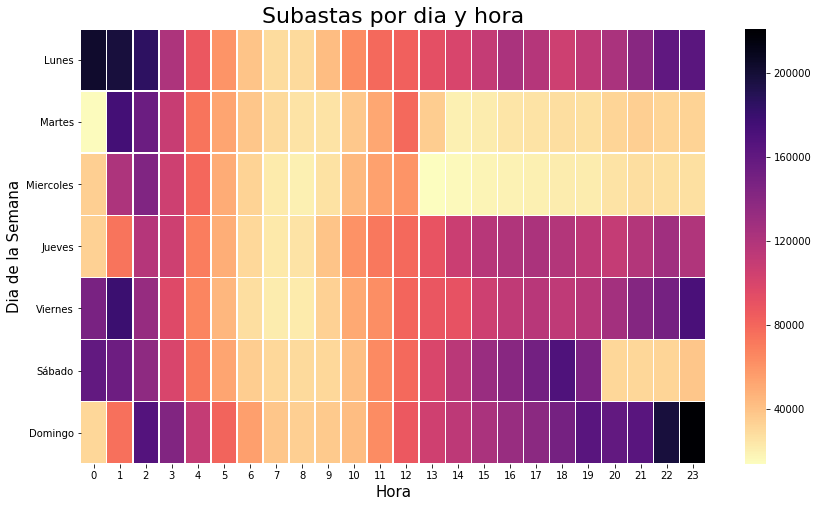

In [67]:
plt.subplots(figsize=(14,8))
grafico_semana=sns.heatmap(table,linewidths=.5,cmap="magma_r")
grafico_semana.set_title("Subastas por dia y hora",fontsize=22)
grafico_semana.set_xlabel("Hora",fontsize=15)
grafico_semana.set_ylabel("Dia de la Semana",fontsize=15)
grafico_semana.set_yticklabels(grafico_semana.get_yticklabels(),rotation=0)